<h1><center> Monte Carlo Methods: </center></h1>
<h1><center> Random Walk Metropolis & Gibbs </center></h1>
<h2><center> Gabija Vaisvilaite </center></h2>
$$ \hspace{1cm} $$
<h3><center> 1. </center></h3>

### **(a)**

Implementing the target distribution density function $f(x,\mu,\sigma,\beta)=\exp\big(-\lvert\frac{x-\mu}{\sigma}\rvert^\beta\big)$ and the random walk Metropolis algorithm which targets $f$ by performing $n \in \mathbb{N}$ steps with the target distribution parameters location $\mu \in \mathbb{R}$, scale $\sigma \in \mathbb{R}_+$ and shape $\beta \in [1,2]$. Here we use symmetric distribution $g \sim \mathcal{N}(0,1)$. Note that we adjusted the original algorithm to have a random initial $X_0$ and to keep observatioms $U[i]$ according to which we either move towards a new $X[i]$ or stay at the same one, we only keep this for easier plotting and analysing, it does not change the purpose of the algorithm.

In [2]:
f  <- function(x,mu,sigma,beta){
    f <- exp(-1*(abs((x-mu)/sigma)^beta))
    f
}

RndWalkMetropolis <- function(n,mu,sigma,beta){
    X <- as.vector(numeric(n))
    X[1] <- runif(1,-5,5)
    U <- runif(n)
    for(i in 2:n){
        Y <- X[i-1] + rnorm(n=1, mean=0, sd=0.75)
        alpha  <- min(1, f(Y,mu,sigma,beta)/f(X[i-1],mu,sigma,beta))
        if(U[i] < alpha) {
            X[i] <- Y
            U[i] <- U[i] 
        } else {
            X[i] <- X[i-1]
            U[i] <- U[i-1]
        }
    }
    X <- X[500:n]
    U <- U[500:n]
    vectors <- list(X,U)
    return(vectors)
}

We set some values that we are going to use and generate $n=10000$ sample.

In [3]:
mu=0
sigma=1
beta=1.5
n=10000

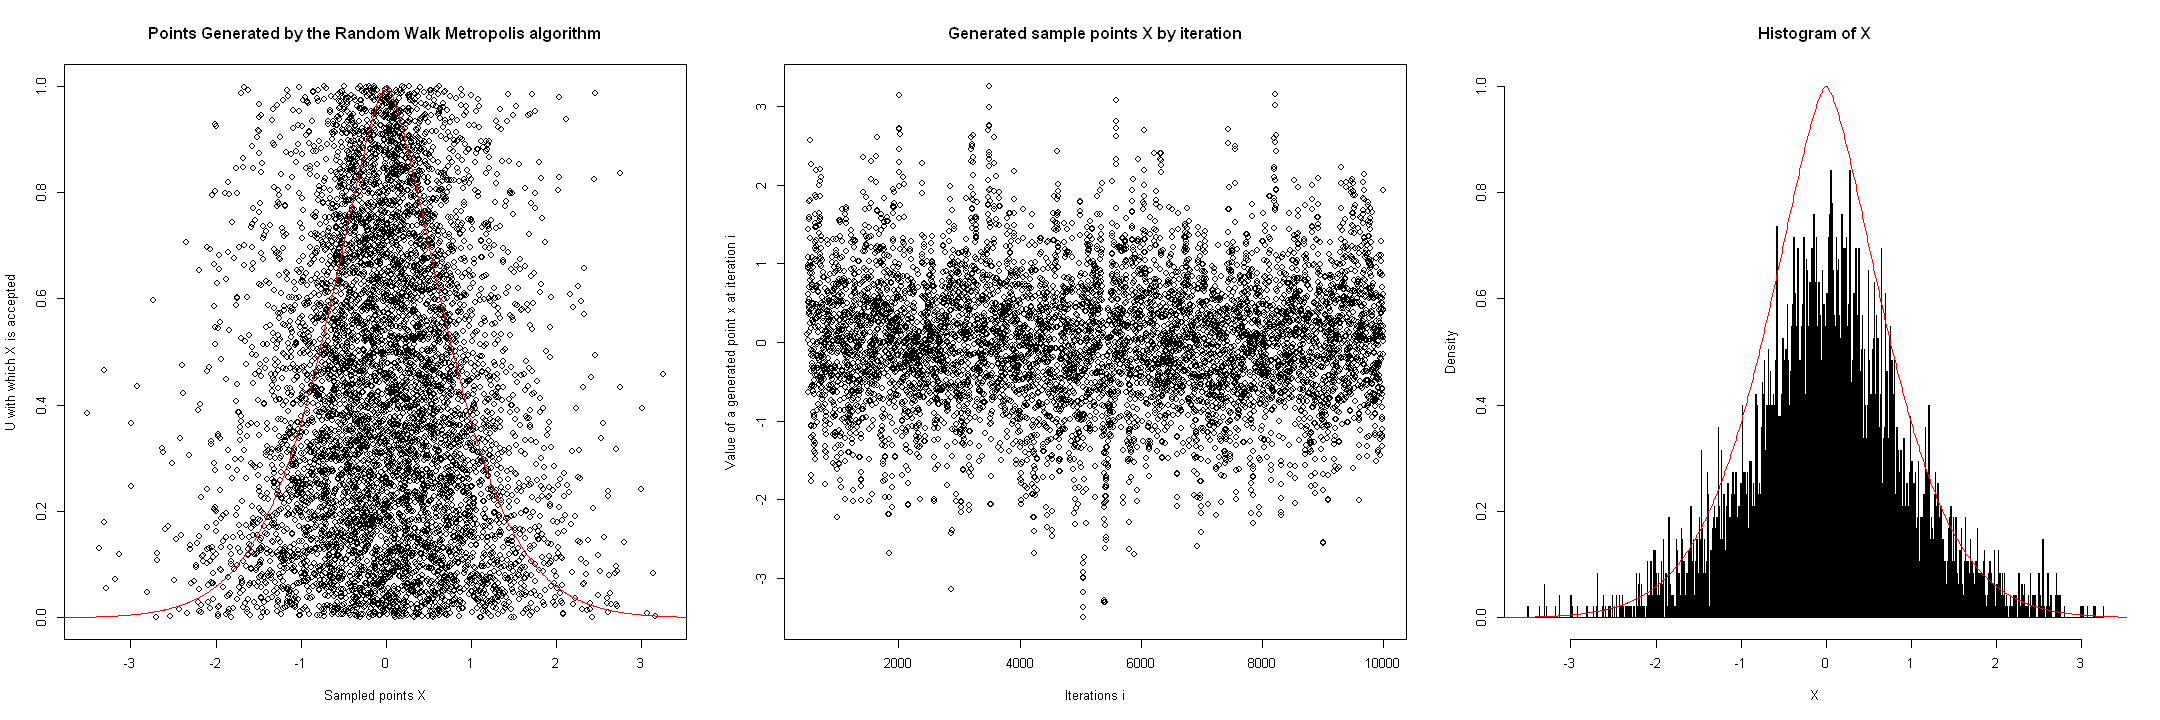

In [4]:
vectors <- RndWalkMetropolis(n,mu,sigma,beta)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
options(repr.plot.width=18, repr.plot.height=6)
pts <- (-1000:1000) / 100
par(mfrow=c(1,3))
plot(X,U, type='p', xlab='Sampled points X', ylab='U with which X is accepted', main='Points Generated by the Random Walk Metropolis algorithm')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')
plot(500:n,X, ylab='Value of a generated point x at iteration i',xlab='Iterations i',main='Generated sample points X by iteration')
hist(X, breaks=floor(n/10), freq=FALSE,ylim=0:1)
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')

### **i.**

Can clearly see that once the random walk takes off from the tails, it does not tend to come back, as assumed, since the probability of a point being in the tail is low. Also, it does not tend to walk too far into the tails either for the same reason. We have picked the scale $\tilde\sigma=0.75$ for the proposal distribution; the generator with larger $\tilde\sigma$ values generates more points at the tails, as the walk takes largers steps (more likely to get to the small probabilities in the tails), creating heavier tails than we would like, however smaller $\tilde\sigma$ generates points very clustered on one side of the distribution, which then clearly does not generate a good sample, for example, the mean changes drastically, at the same time, the walk with small $\tilde\sigma$ does not reach a lot of points at the tails. Observe the plots below. For clarity of the plots we will only use $n=2000$ samples, the function is only adjusted to discard fewer points and include scale $sd$ of proposal distribution.

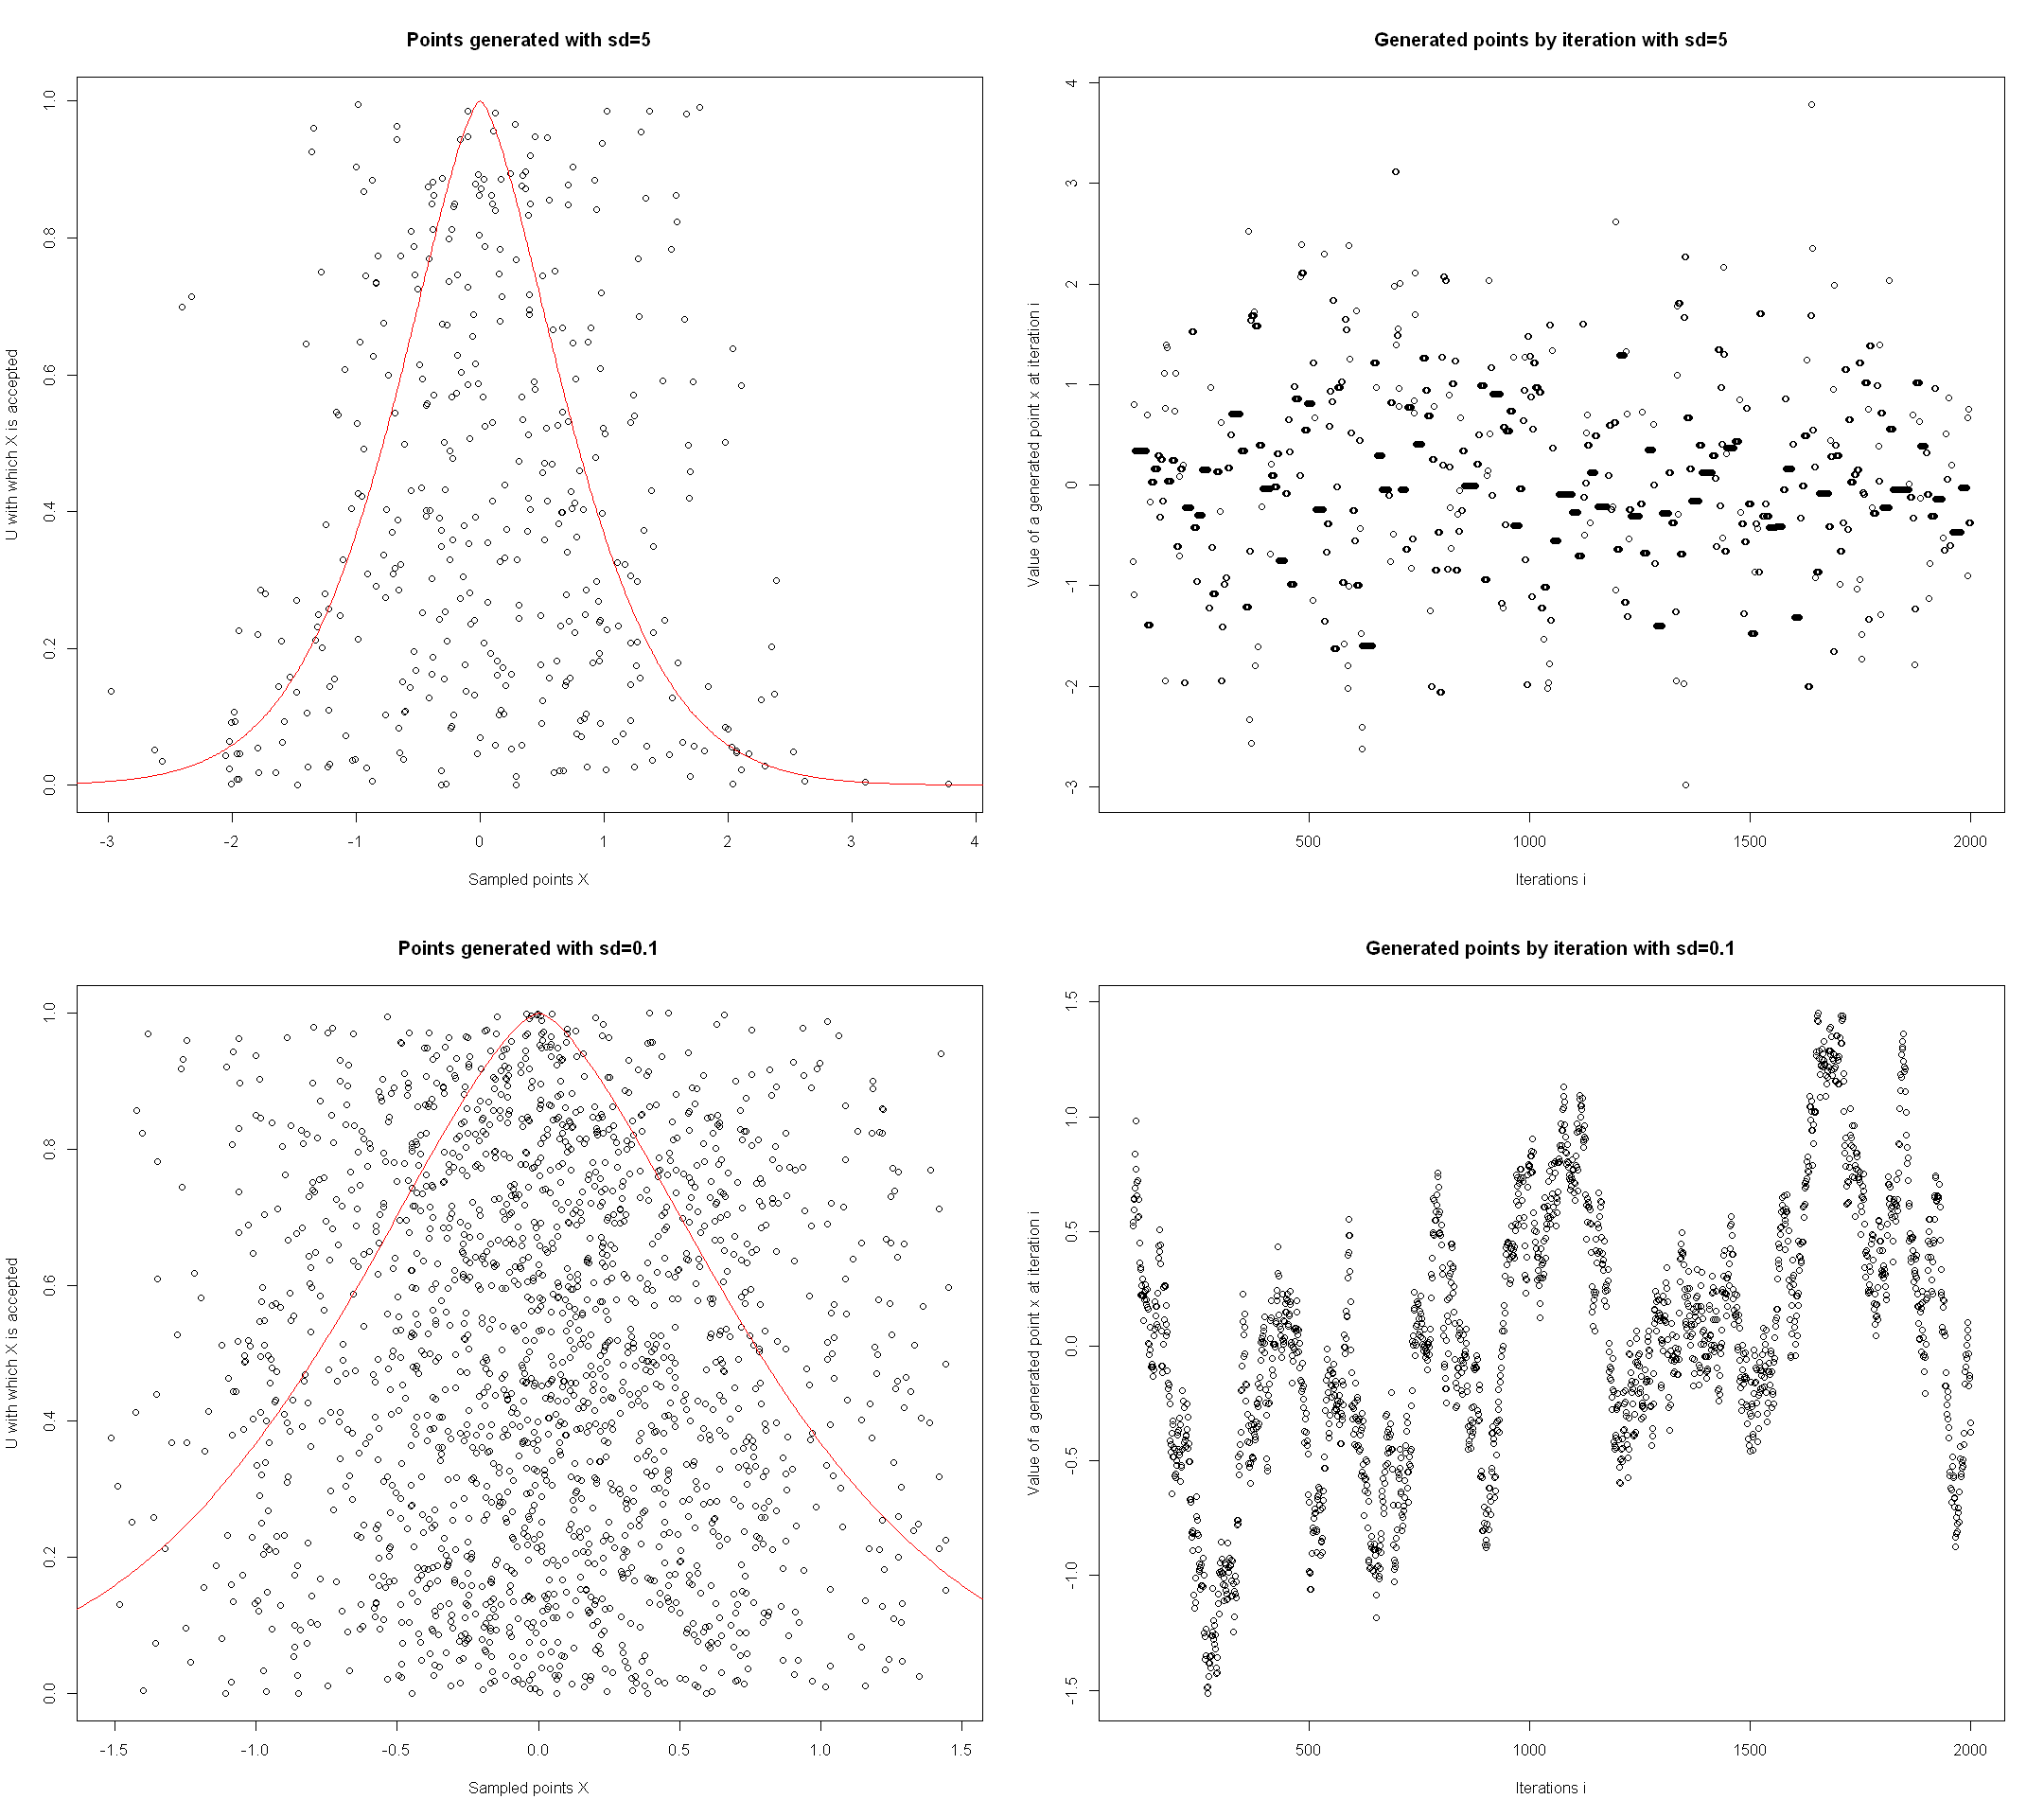

In [5]:
RndWalkMetropolis_sd <- function(n,mu,sigma,beta,sd){
    X <- as.vector(numeric(n))
    X[1] <- runif(1,-5,5)
    U <- runif(n)
    for(i in 2:n){
        Y <- X[i-1] + rnorm(n=1, mean=0, sd)
        alpha  <- min(1, f(Y,mu,sigma,beta)/f(X[i-1],mu,sigma,beta))
        if(U[i] < alpha) {
            X[i] <- Y
            U[i] <- U[i]
        } else {
            X[i] <- X[i-1]
            U[i] <- U[i-1]
        }
    }
    X <- X[100:n]
    U <- U[100:n]
    vectors <- list(X,U)
    return(vectors)
}

n=2000

options(repr.plot.width=18, repr.plot.height=16)
par(mfrow=c(2,2))

sd=5
vectors <- RndWalkMetropolis_sd(n,mu,sigma,beta,sd)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
plot(X,U, type='p', xlab='Sampled points X', ylab='U with which X is accepted', main='Points generated with sd=5')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')
plot(100:n,X, ylab='Value of a generated point x at iteration i',xlab='Iterations i',main='Generated points by iteration with sd=5')

sd=0.1
vectors <- RndWalkMetropolis_sd(n,mu,sigma,beta,sd)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
plot(X,U, type='p', xlab='Sampled points X', ylab='U with which X is accepted', main='Points generated with sd=0.1')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')
plot(100:n,X, ylab='Value of a generated point x at iteration i',xlab='Iterations i',main='Generated points by iteration with sd=0.1')

### **ii.**

We did use a burn-in period i.e. when sampling $n=10000$ samples we discarded the first $500$ samples and when sampling $n=2000$ samples we discarded the first $100$ samples. We did that since without it, especially for small scale values of a proposal distribution, we get that our sample is highly dependent on the initial condition and may be clustered on one side of the distribution. We picked these particular values as they should be enough for the walk to 'get away' from one tail of the distribution and we do not lose too many samples.

### **iii.**
We have tried multiple sample sizes $n$ ranging from $100$ to $100000$ and, obviously, the larger the sample size, the closer the sample looks to the target distribution. However, by checking the histograms (trial and error) it is easy to see that $100$ or even $1000$ samples is not enough to converge to our target distribution, but $10000$ samples seems to do the job. Observe the plots below, note that all plots are with scale of proposal distribution set to $\tilde\sigma=0.75$.

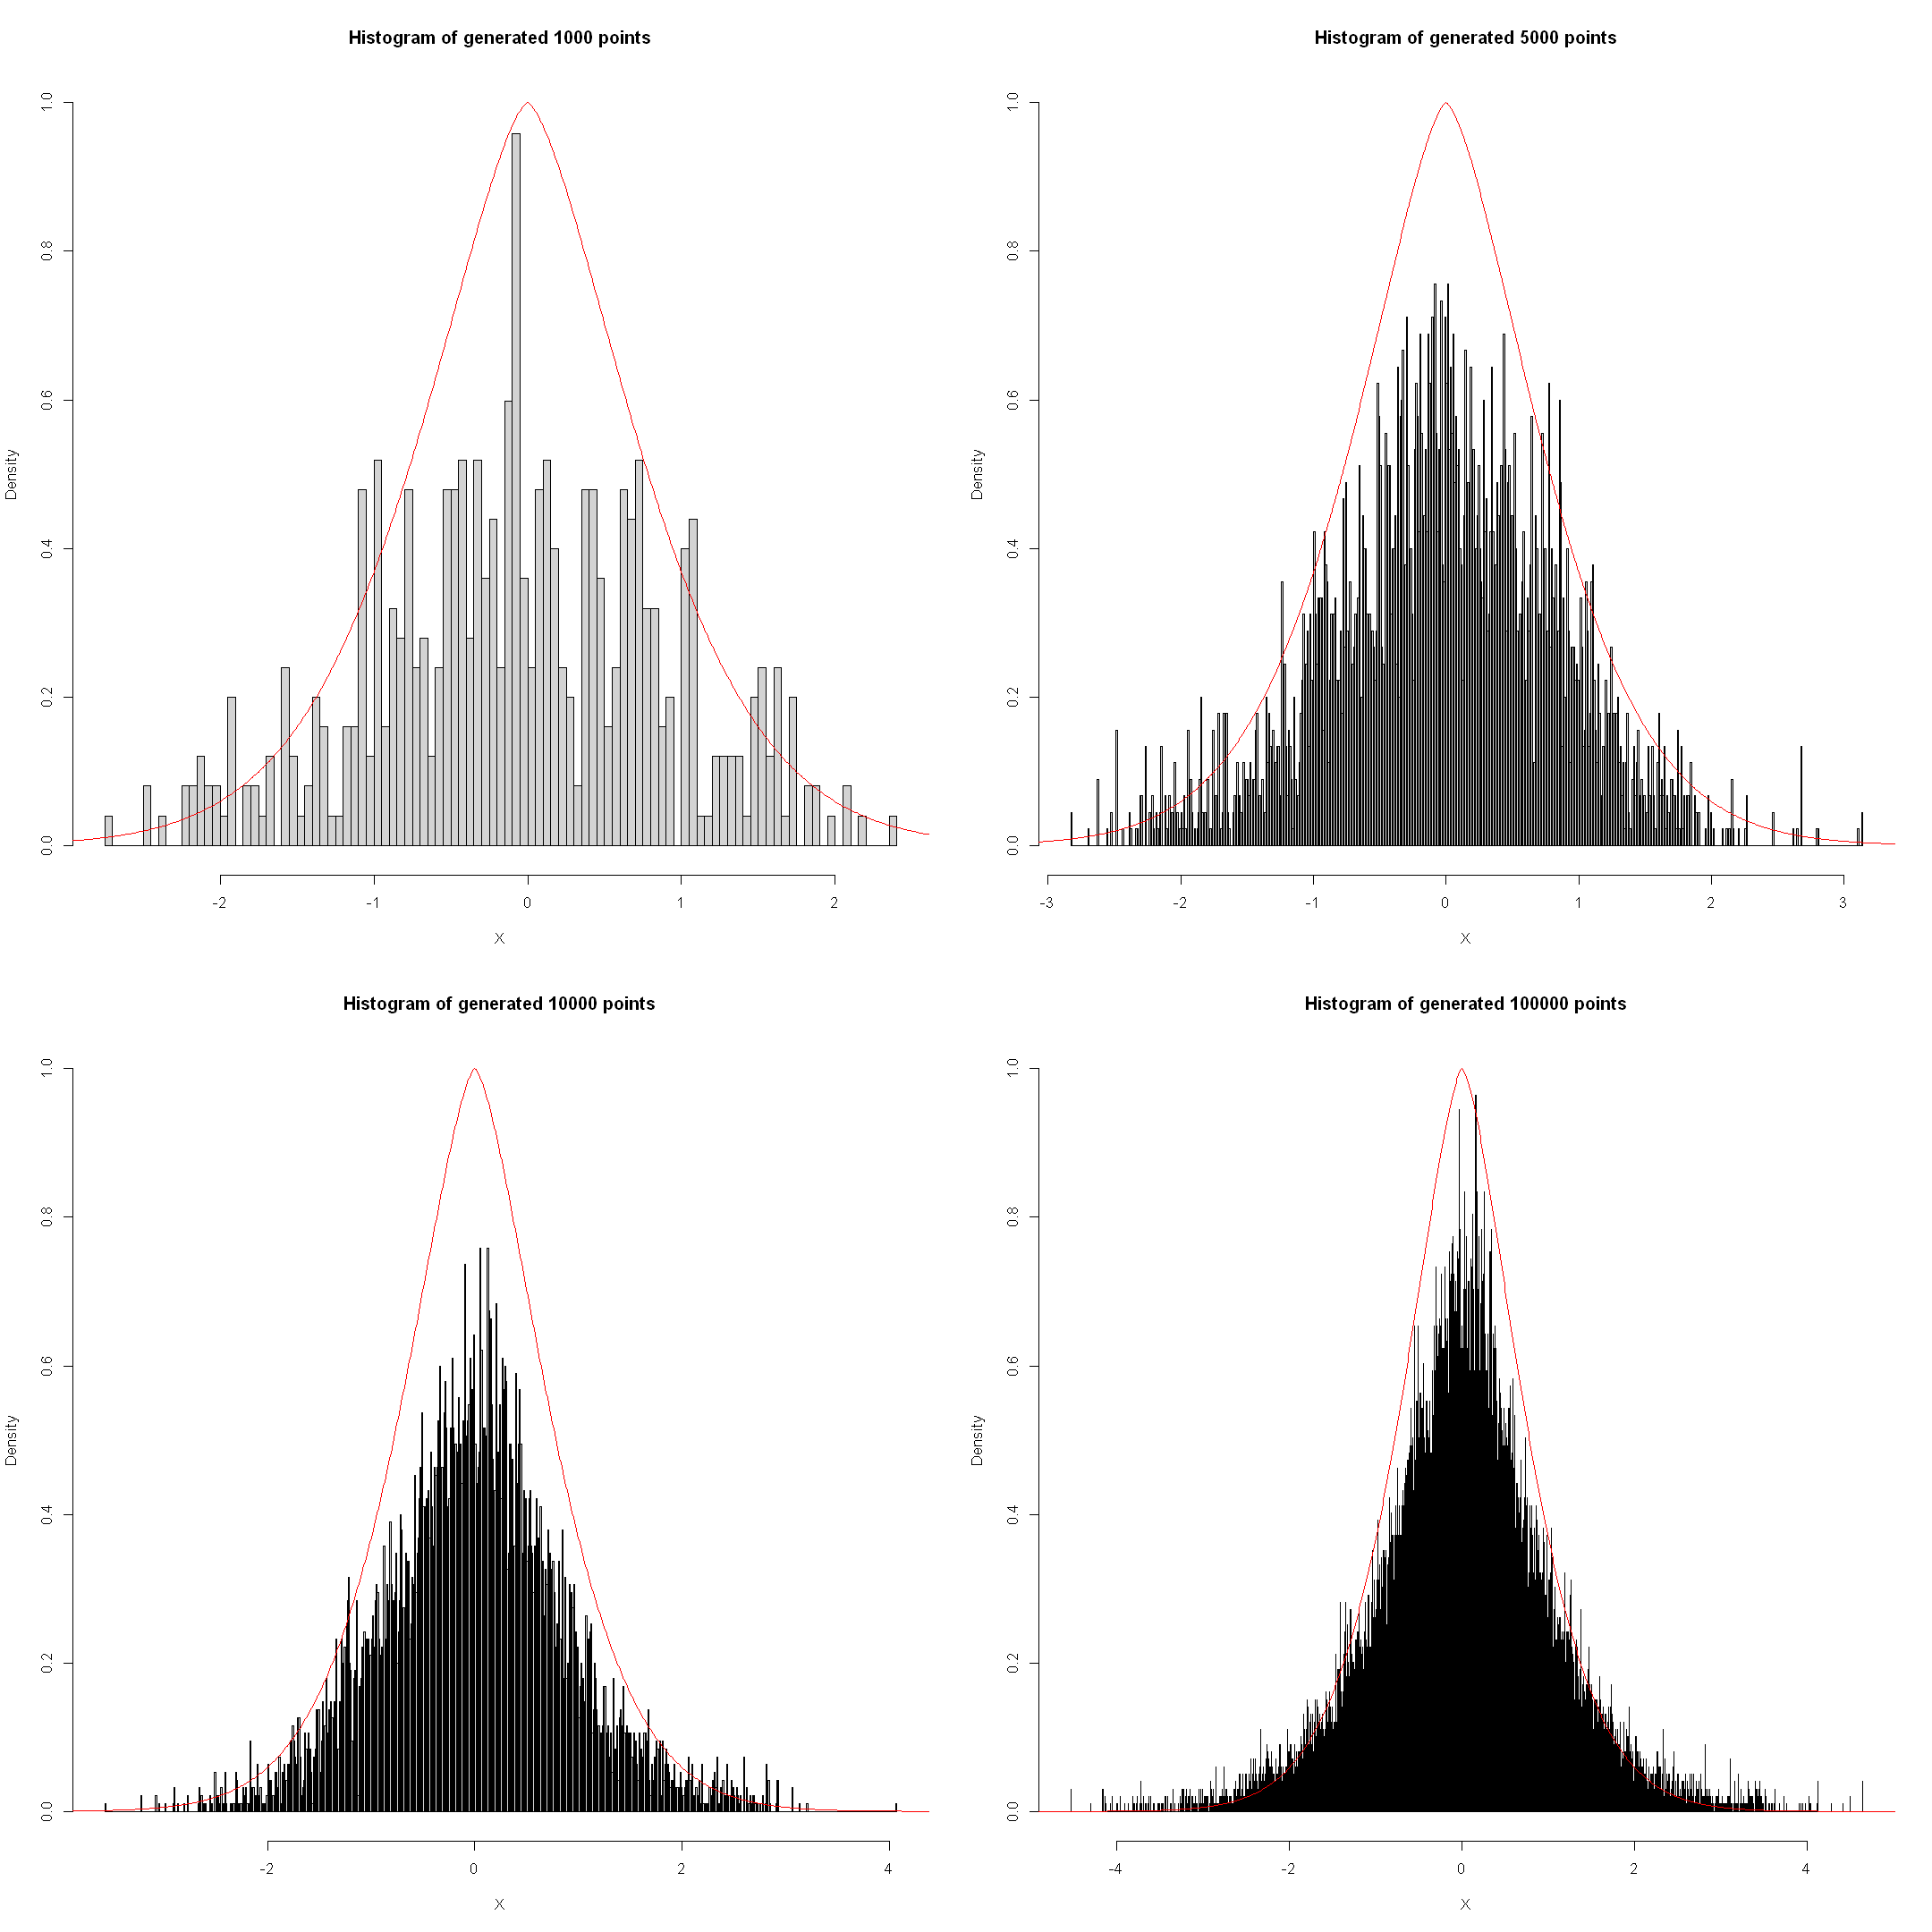

In [6]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(2,2))
pts <- (-1000:1000) / 100

n=1000
vectors <- RndWalkMetropolis(n,mu,sigma,beta)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
hist(X, breaks=floor(n/10), freq=FALSE,ylim=0:1, main='Histogram of generated 1000 points')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')

n=5000
vectors <- RndWalkMetropolis(n,mu,sigma,beta)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
hist(X, breaks=floor(n/10), freq=FALSE,ylim=0:1, main='Histogram of generated 5000 points')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')

n=10000
vectors <- RndWalkMetropolis(n,mu,sigma,beta)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
hist(X, breaks=floor(n/10), freq=FALSE,ylim=0:1, main='Histogram of generated 10000 points')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')

n=100000
vectors <- RndWalkMetropolis(n,mu,sigma,beta)
X <- as.numeric(unlist(vectors[1]))
U <- as.numeric(unlist(vectors[2]))
hist(X, breaks=floor(n/10), freq=FALSE,ylim=0:1, main='Histogram of generated 100000 points')
lines(y=f(pts,mu,sigma,beta),x=pts,type='l',col='red')


### **(b)**

Observe that the second moment $\mathbb{E}[X^2]$ can be written as $\mathbb{E}[X^2]=\big(\mathbb{E}[X]\big)^2+\text{Var}(X)$. Using that we compute 50 estimates of the second moment.

In [7]:
n=10000
k=50
est  <- as.vector(numeric(k))
for(i in 1:k){
    vectors <- RndWalkMetropolis(n,mu,sigma,beta)
    X <- as.numeric(unlist(vectors[1]))
    est[i] <- mean(X)^2+var(X)
}

The estimates of the second moment $\mathbb{E}[X^2]$ of $f$ are:

In [8]:
est

[1] 0.7421826 0.7168846 0.7357324 0.6819730 0.7099213 0.7615583 0.8027380
 [8] 0.6901373 0.7729488 0.7088875 0.7694566 0.6842533 0.7509122 0.7780279
[15] 0.7787605 0.7538438 0.7376947 0.7047520 0.7334649 0.7360357 0.7600227
[22] 0.7578014 0.7228632 0.6914200 0.8161215 0.7683262 0.7745387 0.7585177
[29] 0.6894591 0.7467222 0.7717190 0.7339521 0.7659329 0.7356087 0.7812837
[36] 0.7270833 0.7219934 0.7373452 0.7268439 0.7708924 0.7301089 0.6973045
[43] 0.6627490 0.7241211 0.7008074 0.6969938 0.7777834 0.7565923 0.7524389
[50] 0.8301835

The variance $\text{Var}\big(\mathbb{E}[X^2]\big)$ of the estimates of the second moment$\mathbb{E}[X^2]$ is:

In [9]:
var(est)

[1] 0.001285045

### **(c)**

Consider a slightly adapted algorithm from the one before, i.e. $RndWalkMetropolis(n,\mu,\sigma,\beta)$, which generates (suppose) $n=100000$ samples with set parameters $\mu=0$, $\sigma=1$. Now for $\beta$, instead of setting specific value, for each iterate $i$ in the **for** loop we also generate $\beta \sim \mathsf{U}[a_k,b_k]$, where $k=0,1,...,9$ and the intervals respectively are $[a_k,b_k]=$ $[1.0, 1.1]$, $[1.2, 1.3]$, ... ,$[1.9, 2.0]$ and we use $k=0$ for the first $\frac{n}{10}$ iterates $i$, then $k=1$ for the next $\frac{n}{10}$ iterates $i$ and so on. In this way we generate a single Markov chain where each sampled $X_i$ is from generalised Gaussian distribution with location $\mu=0$, scale $\sigma=1$ and different shape $\beta \in [1,2]$. However note that by the construct of our model we also should approximately have that $\beta \sim \mathsf{U}[1,2]$. Thus the variance of $f(x; 0, 1, \beta)$ for a range of values of $\beta$ should simply be $\text{Var}(X)$ where $X$ is the sample obtained by performing this algorithm. As $\beta \sim \mathsf{U}[1,2]$ we have that mean of $\beta$ is $1.5$ and so the invariant distribution of this Markov chain is simply $f(x;0,1,1.5)$, i.e. the distribution is the same as the one we worked with in previous parts of this exercise. To compute the variance of $X_\beta$ with distribution $f(x;0,1,\beta)$ for any $\beta \in [1,2]$ we simply perform a computation $\text{Var}(X_\beta)$ where $X_\beta$ is a subset of earlier generated $X$ such that $\beta \in [a,b] \subset [1,2]$ is the mean of this interval.


$$ \hspace{1cm} $$
<h3><center> 2. </center></h3>

### (a) 

The Gibbs Sampler from $\mathsf{U}\big\{(x,u): u \leq f(x) \big\}$ can be written as:

$\underline{\textbf{Algorithm}}$

Start with $\big( X^{(0)}, U^{(0)} \big)$ iterate for $t=1,2,...$ and do:

> $1.$ Draw $X^{(t)} \sim f_{X\lvert U}\big(X^{(t)}\lvert U^{(t-1)}\big)$

> $2.$ Draw $U^{(t)} \sim f_{U\lvert X}\big(U^{(t)}\lvert X^{(t)}\big)$

Which, for these particular conditional density functions $f_{X\lvert U}$ and $f_{U\lvert X}$ can be rewritten as:

$\underline{\textbf{Algorithm}}$

Start with $\big( X^{(0)}, U^{(0)} \big)$ iterate for $t=1,2,...$ and do:

> $1.$ Draw $X^{(t)} \sim \mathsf{U}\big\{x: f(x)\geq U^{(t-1)} \big\}$

> $2.$ Draw $U^{(t)} \sim \mathsf{U}\big[ 0, f(X^{(t)})\big]$

Which, adjusted to indexing can be rewritten as:

$\underline{\textbf{Algorithm}}$

Start with $X^{(0)}\in \text{supp}(f)$, iterate for $t=1,2,...$ and do:

> $1.$ Draw $U^{(t)} \sim \mathsf{U}\big[ 0, f(X^{(t-1)})\big]$

> $2.$ Draw $X^{(t)} \sim \mathsf{U}\big\{x: f(x)\geq U^{(t)} \big\}$

Which is exactly the Slice Sampling algorithm.

### (b)

By Proposition 4.1 in the lecture notes, the joint distribution $f(x,u)$ is the invariant distribution of the Markov chain generated by the Gibbs sampler. As, by part **(a)**, the Gibbs sampler is the same as the Slice sampler for this problem, looking at the last Algorithm (adjusted for indexing) we can deduce that the invariant distribution of $X^{(t)}$ has the density $f(\cdot)$.

### (c)

### i.

$\underline{\textbf{Algorithm}}$

Start with $X^{(0)}\in \mathbb{R}$, iterate for $t=1,2,...$ and do:

- $1.$
    - If $X^{(t-1)}\in\big[-5,-3\big]$ do:
    
        - Draw $U^{(t)} \sim \mathsf{U}\big[ 0, \frac{3}{8}\big(1-\big(X^{(t-1)}+4\big)^2\big)\big]$

    - If $X^{(t-1)}\in\big[3,5\big]$ do:

        - Draw $U^{(t)} \sim \mathsf{U}\big[ 0, \frac{3}{8}\big(1-\big(X^{(t-1)}-4\big)^2\big)\big]$
        
    - Else do:
        - Draw $U^{(t)} \sim 0$

- $2.$ 

    - With probability $p=\frac{1}{2}$ do:
        
        - Draw $X^{(t)} \sim \mathsf{U}\big[-4-D,-4+D\big]$
        
    - Otherwise do:
    
        - Draw $X^{(t)} \sim \mathsf{U}\big[4-D,4+D\big]$

Where $D=\sqrt{1-\frac{8}{3}U^{(t)}}$

### ii.

In [10]:
pdf.f  <- function(x){
    ind.low <- (x <= -3 & x >= -5)
    ind.high <- (x >= 3 & x <= 5)
    ind.else  <- ((x < -5) | (x > 5) | (x <3 & x > -3))
  
    u <- c()
    u[ind.low] <- (3/8)*(1-(x[ind.low]+4)^2)
    u[ind.high] <- (3/8)*(1-(x[ind.high]-4)^2)
    u[ind.else] <- 0
    u
}

slice  <-  function(n){
    X <- as.vector(numeric(n))
    X[1] <- runif(1,-5,5)
    U <- as.vector(numeric(n))
    Y <- runif(n)
    for(t in 2:n){
        U[t]  <- runif(1,0,pdf.f(X[t-1]))
        D  <- sqrt(1-(8/3)*U[t])
        if(Y[t] < 0.5) {
            X[t] <- runif(1,-4-D,-4+D) 
        } else {
            X[t] <- runif(1,4-D,4+D)
        }
    }
    X  <- X[2:n]
    U  <- U[2:n]
    vectors <- list(X,U)
    return(vectors)
}

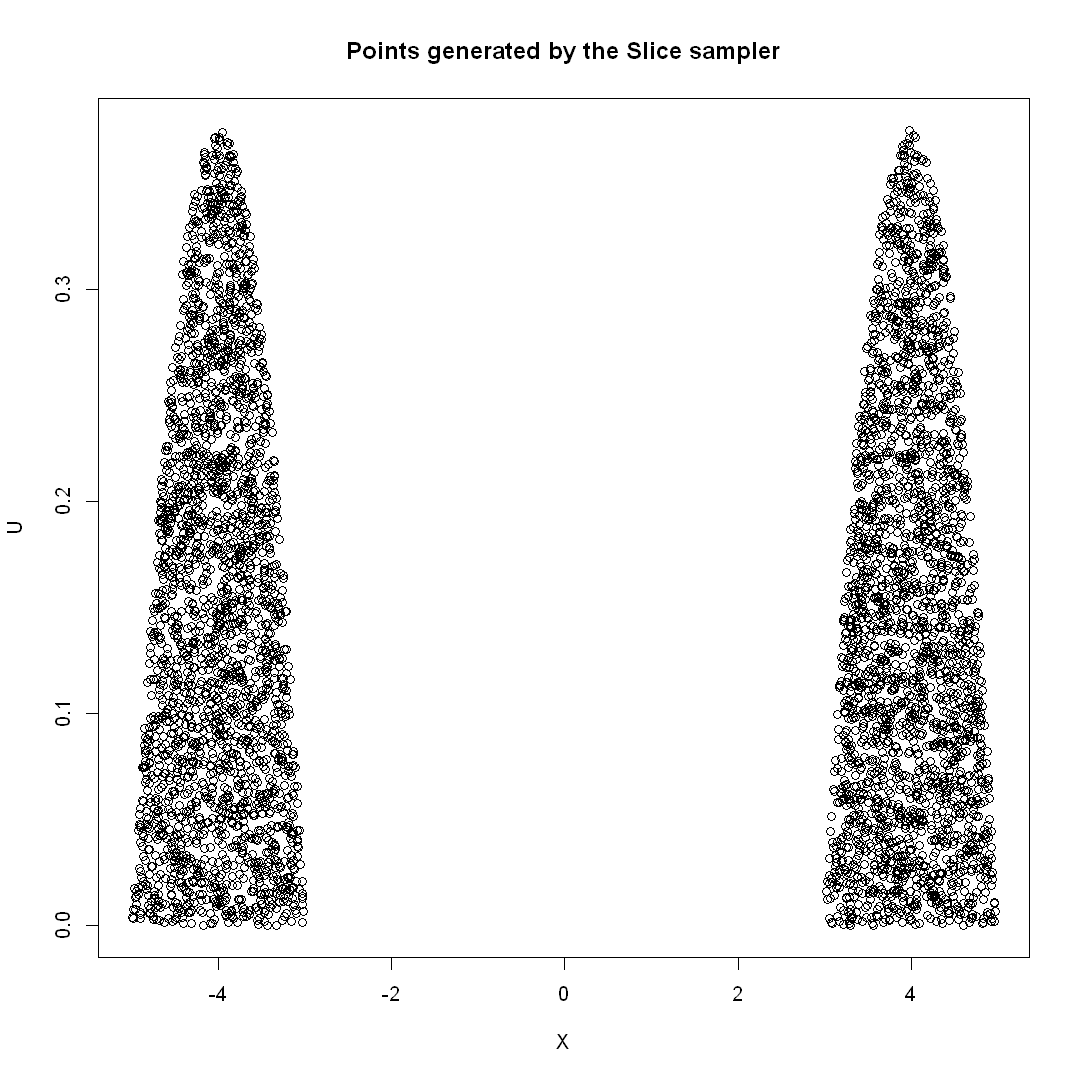

In [11]:
vectors <- slice(5001)
X1 <- as.numeric(unlist(vectors[1]))
U1 <- as.numeric(unlist(vectors[2]))

options(repr.plot.width=9, repr.plot.height=9)
plot(X1,U1,xlab='X',ylab='U',main='Points generated by the Slice sampler',type='p')

Using the slice sampler to generate $n=5000$ observations we get that the mean of $f$ is:

In [12]:
mean(X1)

[1] 0.0255237

And the variance of $f$ is:

In [13]:
var(X1)

[1] 16.15469

Now we implement the random walk Metropolis algorithm to sample from $f$. We use scale $9$ for the proposal distribution so that it would be possible in the walk to jump between the two clusters and it could be done with ease i.e. we would not have one cluster significantly larger in the number of samples than the other cluster.

In [14]:
RndWalkMetropolis2 <- function(n){
    X <- as.vector(numeric(n))
    X[1] <- runif(1,-5,5)
    U <- runif(n)
    for(i in 2:n){
        Y <- X[i-1] + rnorm(n=1, mean=0, sd=9)
        
        if(pdf.f(X[i-1]) < 0.1^6) {
            alpha <- 1
        } else {
            alpha <- min(1, pdf.f(Y)/pdf.f(X[i-1]))
        }
        
        if(U[i] < alpha) {
            X[i] <- Y
            U[i] <- U[i]
        } else {
            X[i] <- X[i-1]
            U[i] <- U[i-1]
        }
    }
    vectors <- list(X,U)
    return(vectors)
}

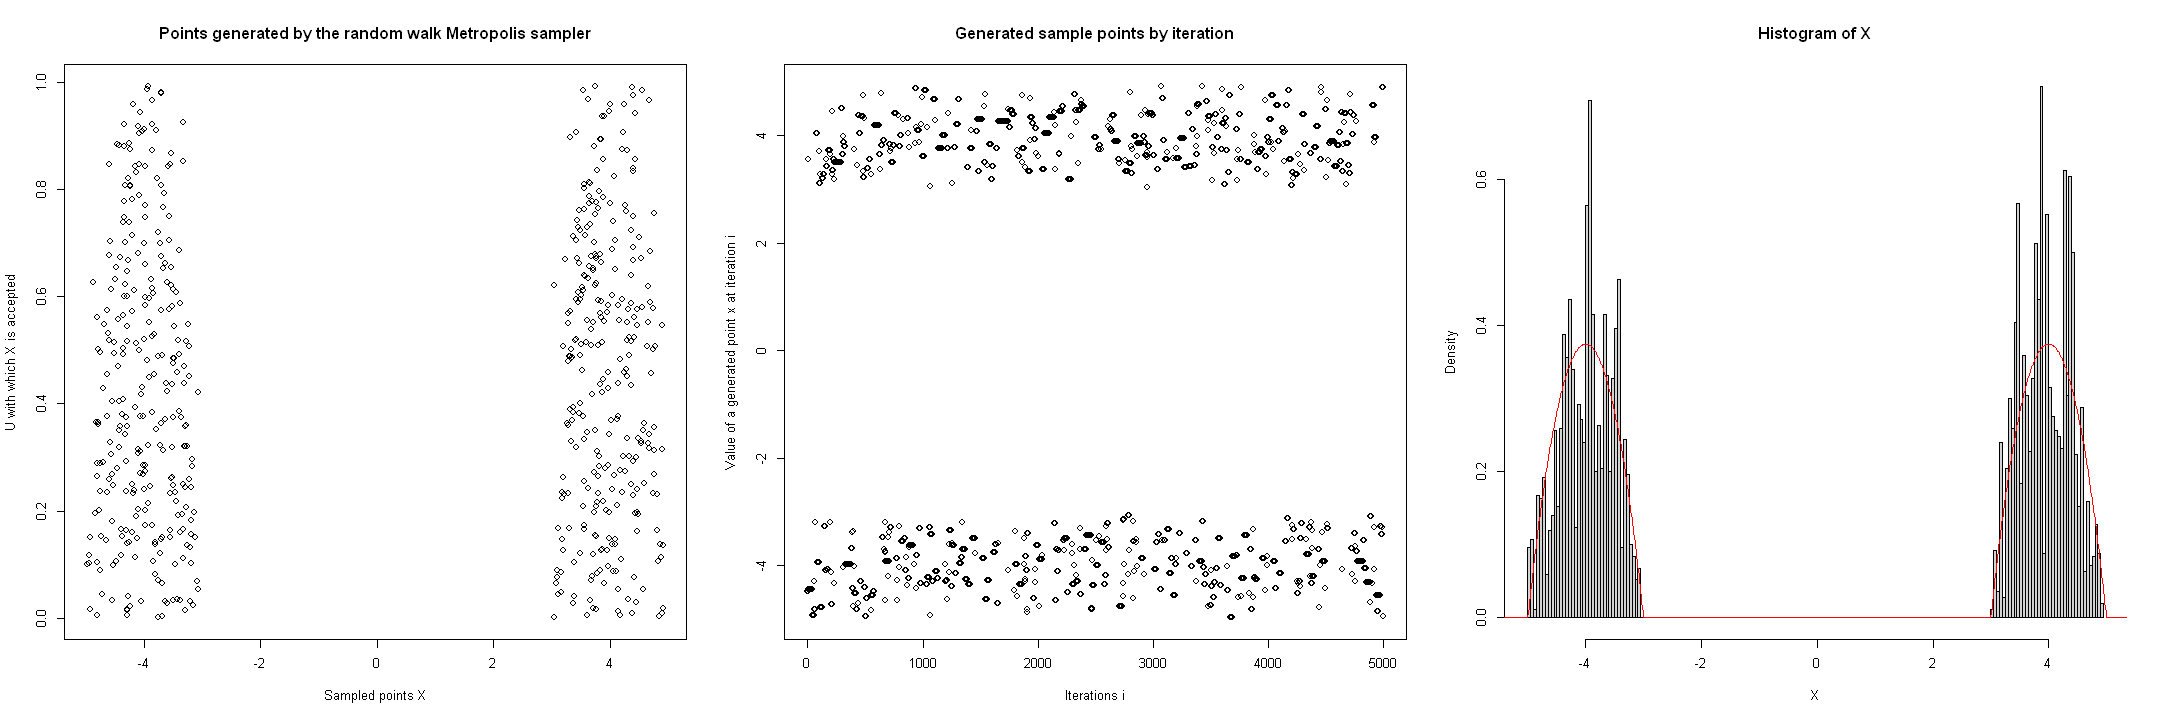

In [20]:
n=5000
vectors <- RndWalkMetropolis2(n)
X2 <- as.numeric(unlist(vectors[1]))
U2 <- as.numeric(unlist(vectors[2]))
pts <- (-1000:1000) / 100
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3))
plot(X2,U2, type='p', xlab='Sampled points X', ylab='U with which X is accepted', main='Points generated by the random walk Metropolis sampler')
plot(1:n,X2, ylab='Value of a generated point x at iteration i',xlab='Iterations i',main='Generated sample points by iteration')
hist(X2, breaks=n/20, freq=FALSE, main='Histogram of X', xlab='X')
lines(y=pdf.f(pts),x=pts,type='l',col='red')

Using the random walk Metropolis sampler to generate $n=5000$ observations we get that the mean of $f$ is:

In [21]:
mean(X2)

[1] 0.1801647

And the variance of $f$ is:

In [22]:
var(X2)

[1] 15.87055

### iii.

Even from the plots above we can clearly see that Slice Sampler works better for the distribution with given density, as the sample produced by the slice sampler seems to more closely resemble the given distribution density function than the sample produced by the random walk Metropolis algorithm.

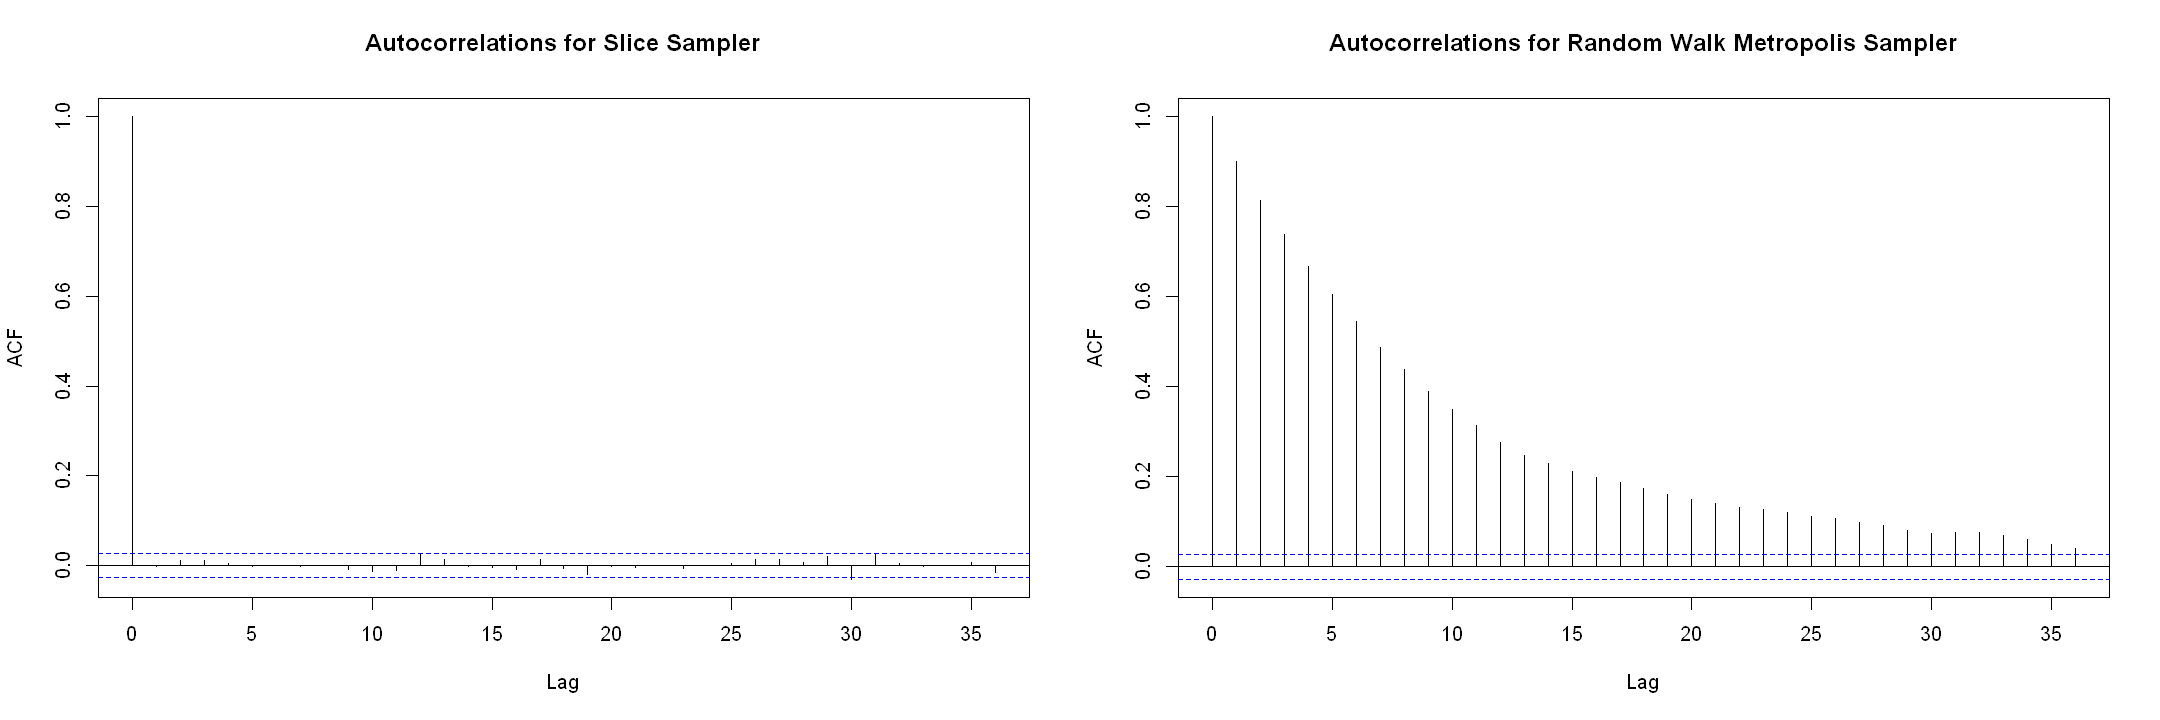

In [23]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,2))
autocf1 <- acf(X1, plot=FALSE)
plot(autocf1, main = 'Autocorrelations for Slice Sampler')
autocf2 <- acf(X2, plot=FALSE)
plot(autocf2, main = 'Autocorrelations for Random Walk Metropolis Sampler')

From the plots above we deduce that the Random Walk Metropolis algorithm produces points with a large amount of autocorrelation whereas only around 0 the Slice Sampler has large autocorrelation which is to be expected.

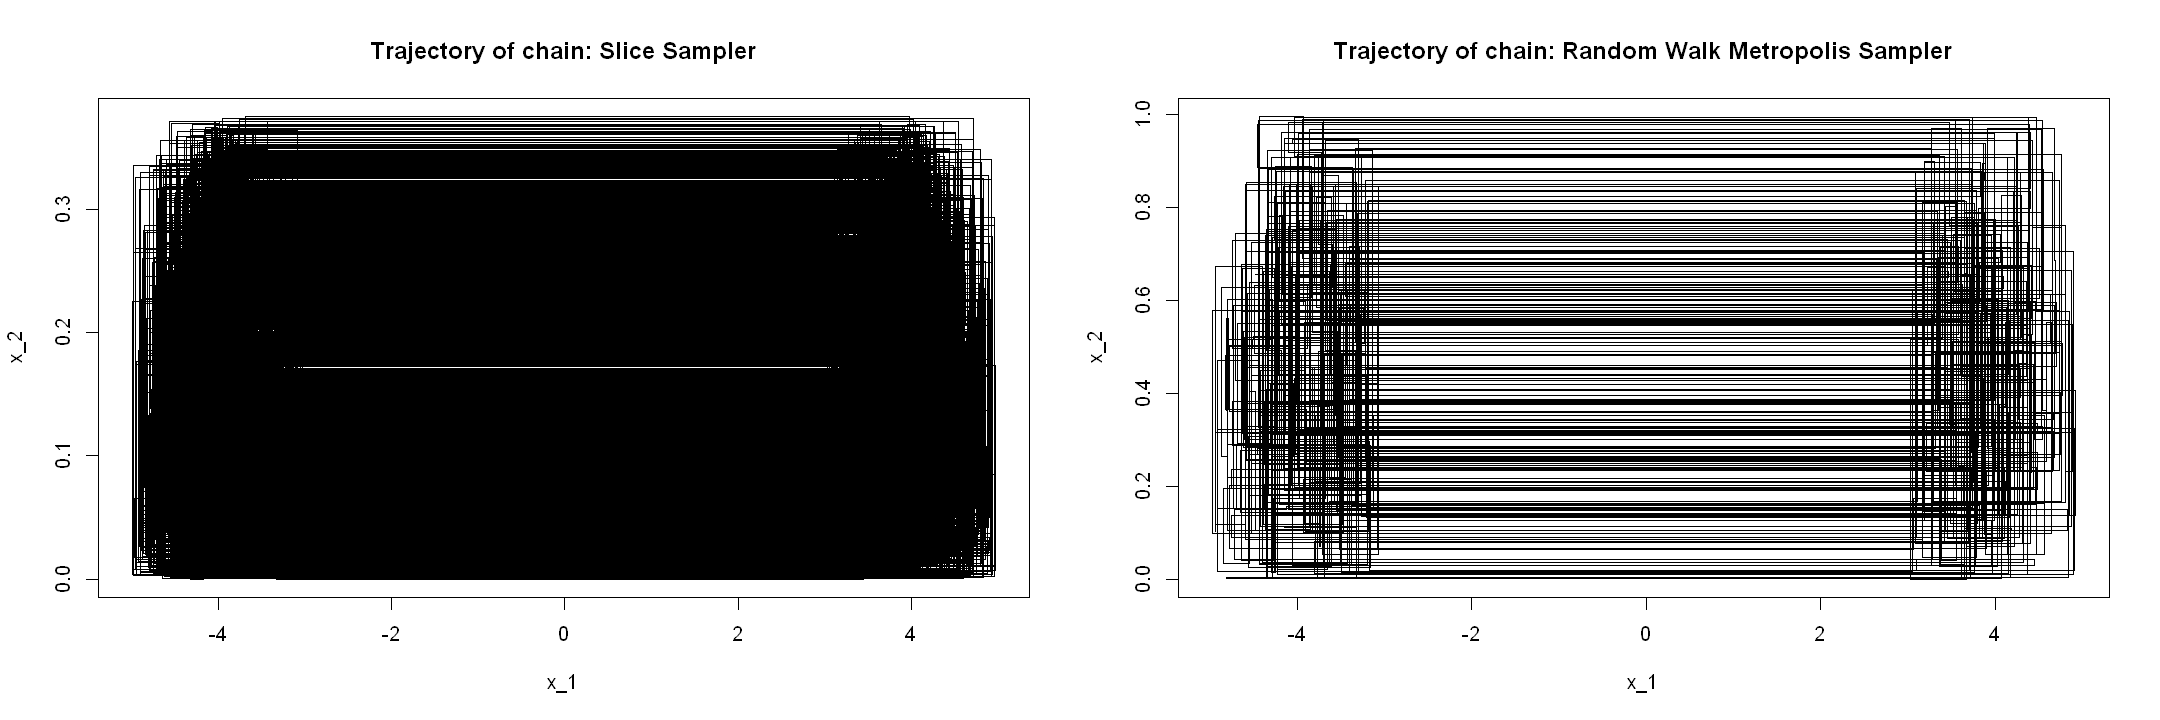

In [24]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,2))
plot(X1, U1, type = 's', xlab = 'x_1', ylab = 'x_2', main = 'Trajectory of chain: Slice Sampler')
plot(X2, U2, type = 's', xlab = 'x_1', ylab = 'x_2', main = 'Trajectory of chain: Random Walk Metropolis Sampler')

By the plots above we can clearly see that the slice sampler produces better estimates (as the trajectory chain covers more of the are) whereas it seems like a lot of the times the random walk Metropolis sampler does not move to either direction, leading to more stops, fewer good samples, and such 'incomplete' trajectory chain.

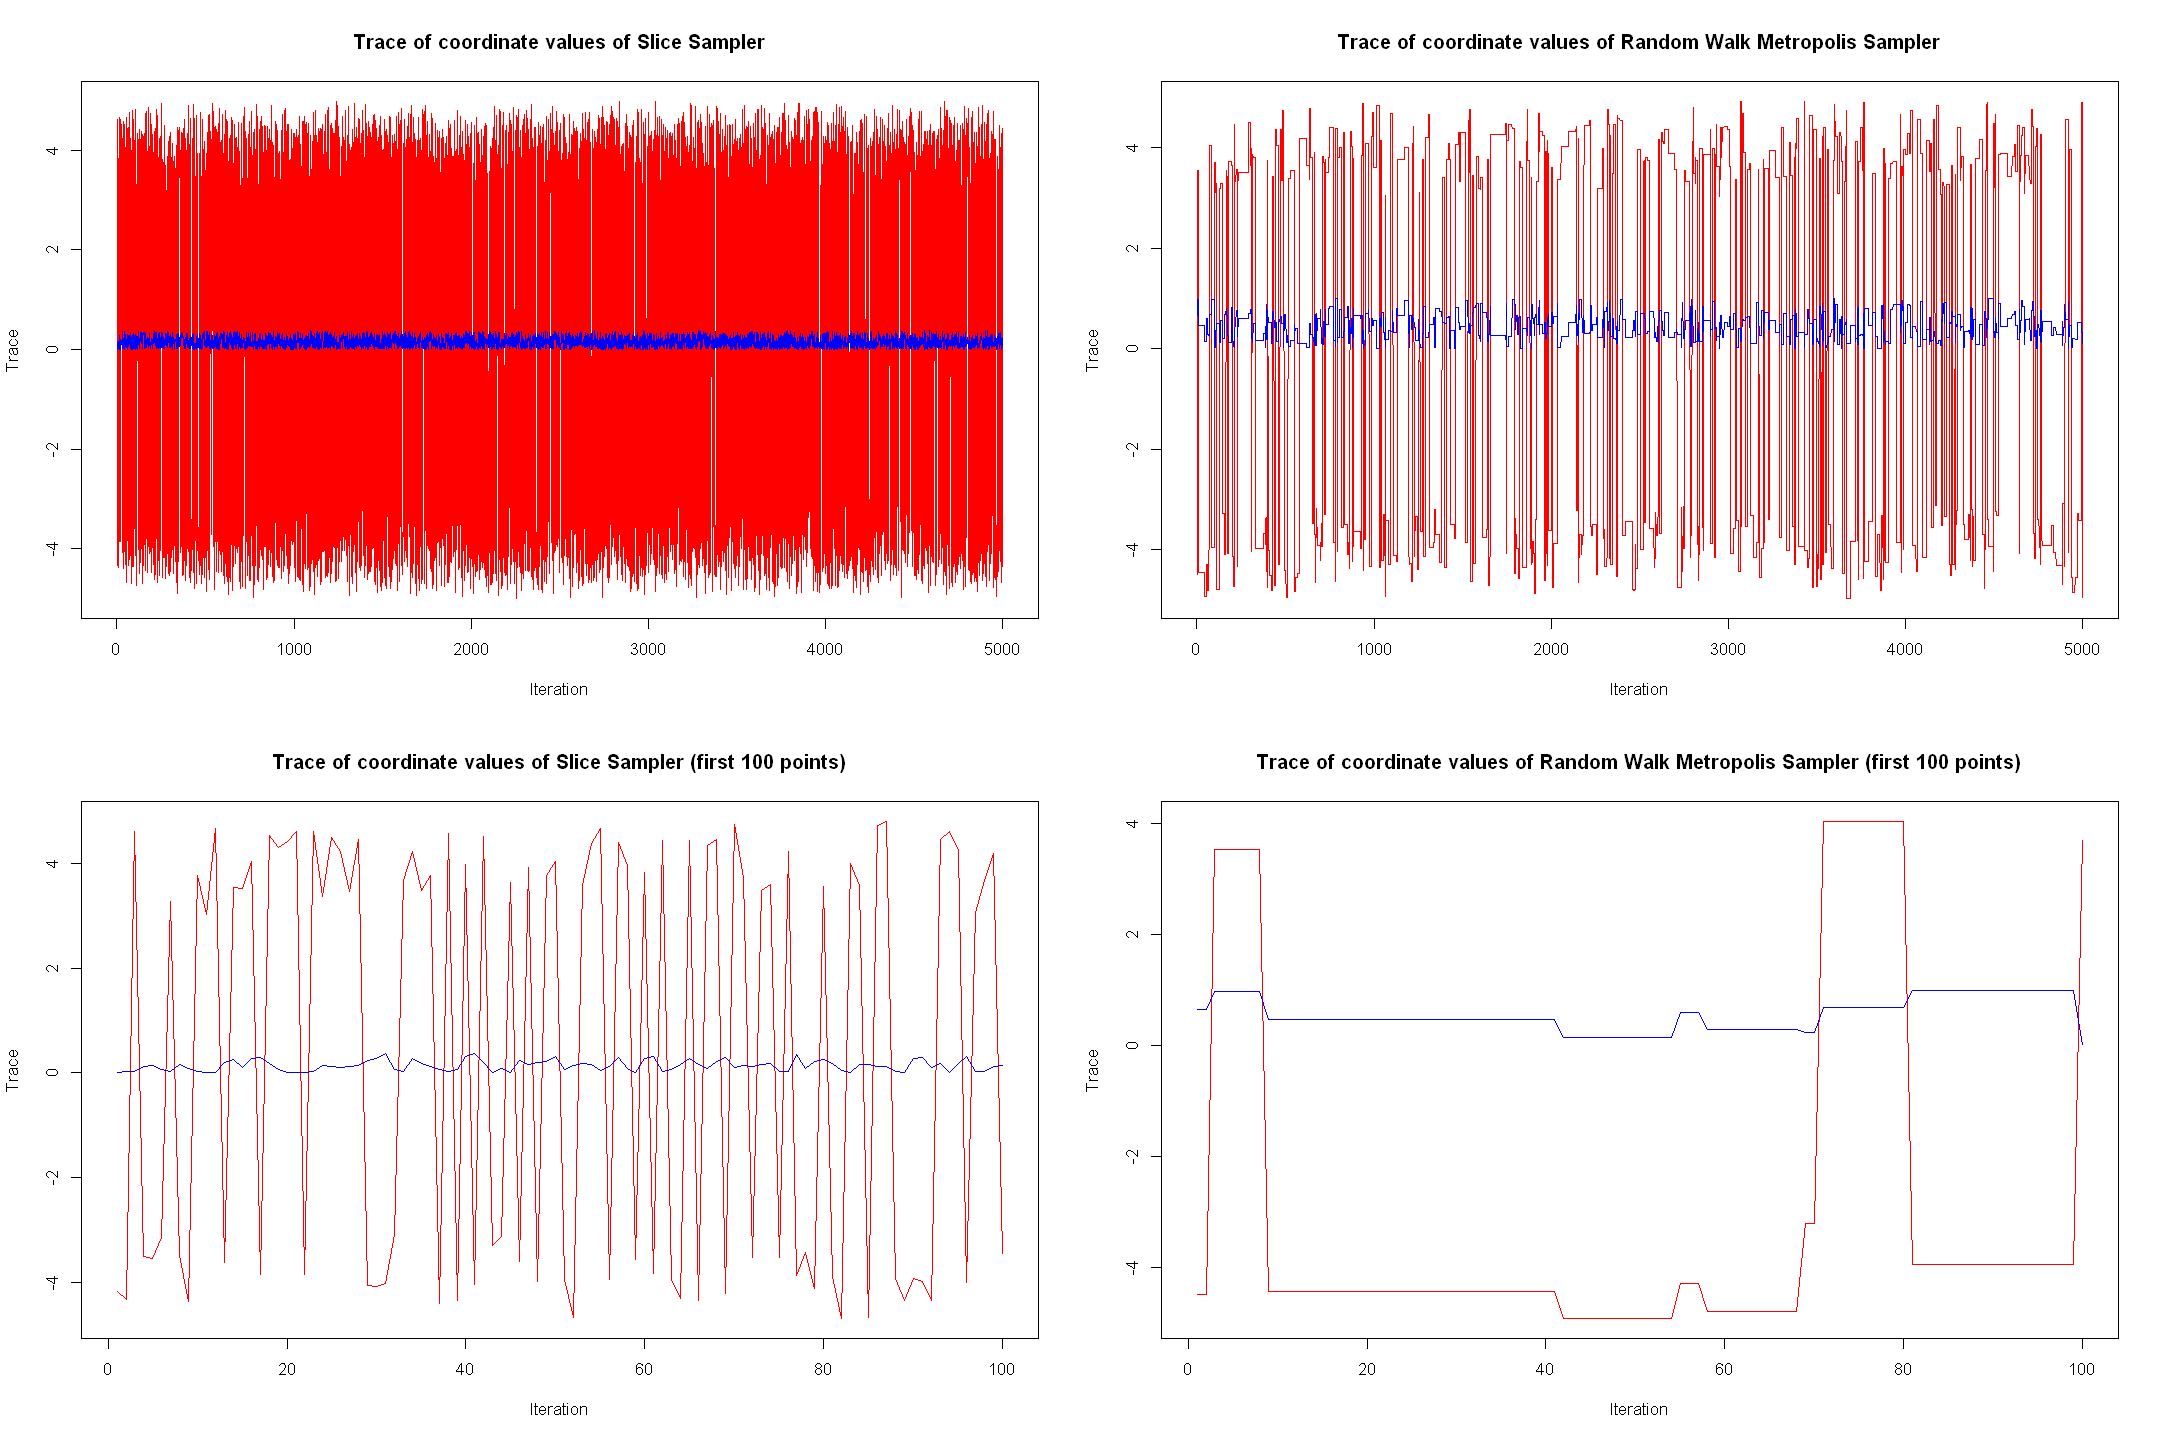

In [25]:
options(repr.plot.width=18, repr.plot.height=12)
par(mfrow=c(2,2))
plot(X1, type = 'l', xlab = 'Iteration', ylab = 'Trace', main = 'Trace of coordinate values of Slice Sampler', col="red")
lines(U1, type = 'l', col="blue")
plot(X2, type = 'l', xlab = 'Iteration', ylab = 'Trace', main = 'Trace of coordinate values of Random Walk Metropolis Sampler', col="red")
lines(U2, type = 'l', col="blue")
plot(X1[1:100], type = 'l', xlab = 'Iteration', ylab = 'Trace', main = 'Trace of coordinate values of Slice Sampler (first 100 points)', col="red")
lines(U1[1:100], type = 'l', col="blue")
plot(X2[1:100], type = 'l', xlab = 'Iteration', ylab = 'Trace', main = 'Trace of coordinate values of Random Walk Metropolis Sampler (first 100 points)', col="red")
lines(U2[1:100], type = 'l', col="blue")

As observed before the plots above only confirm that the random walk Metropolis sampler does stop and do not produce steps for many iterates in a row, leading to it producing fewer distint sample points, which is why it is worse sampler than the slice sampler. 

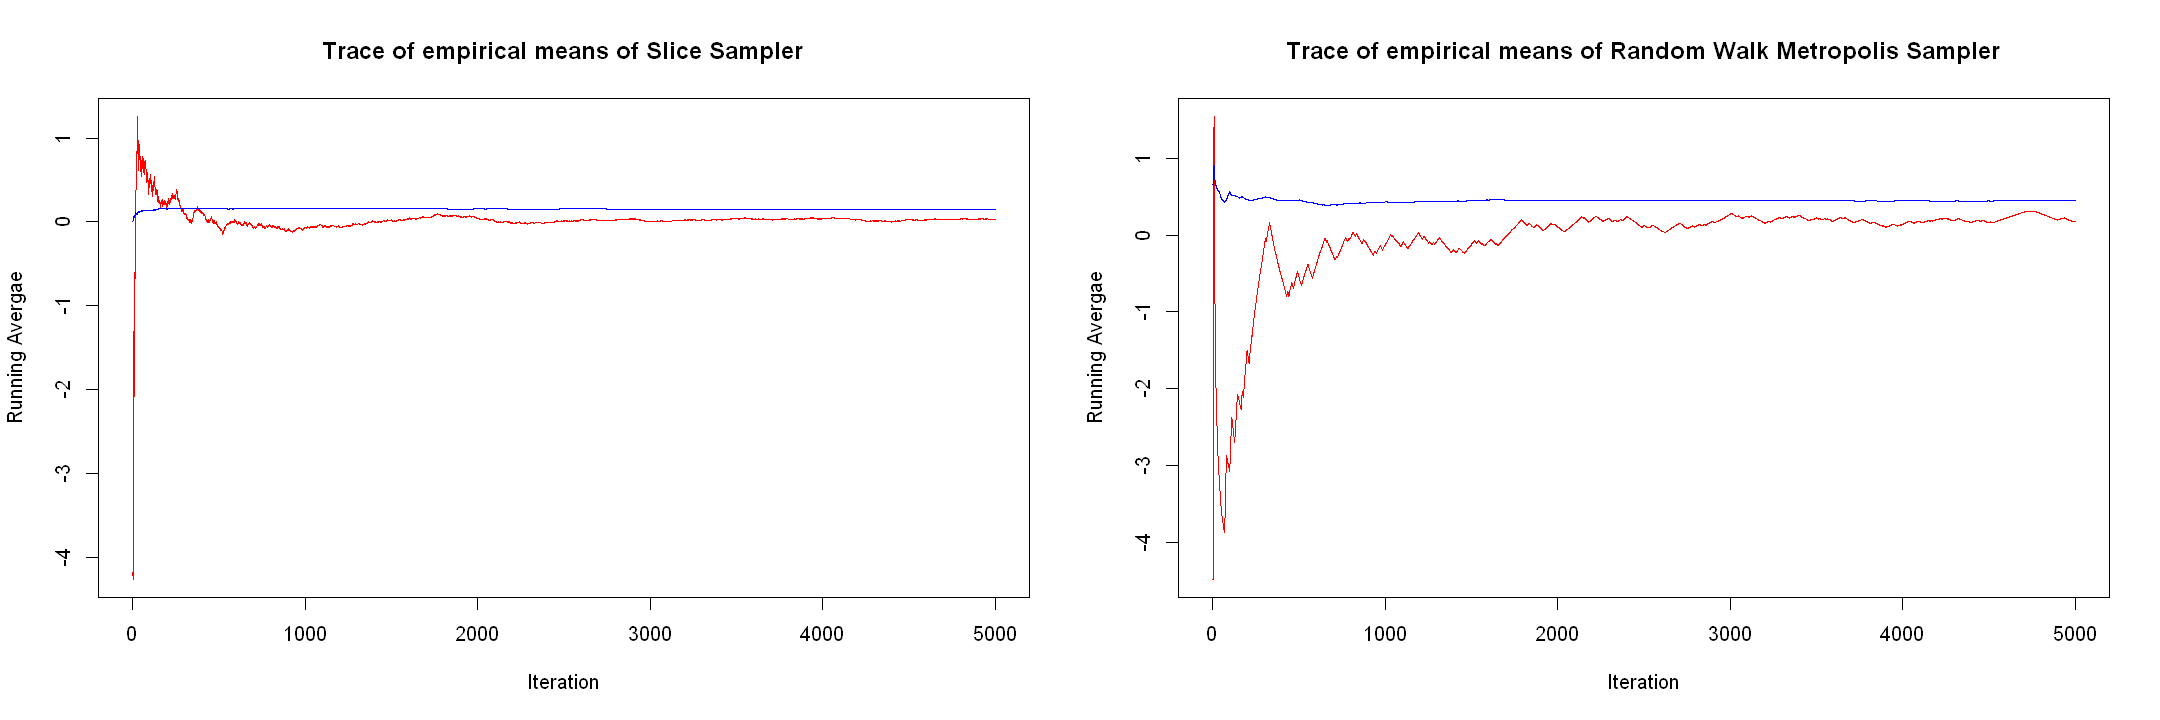

In [26]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,2))
plot(cumsum(X1) / seq_along(X1), type = 'l', xlab = 'Iteration', ylab = 'Running Avergae', main = 'Trace of empirical means of Slice Sampler', col="red")
lines(cumsum(U1) / seq_along(U1), type = 'l', col="blue")
plot(cumsum(X2) / seq_along(X2), type = 'l', xlab = 'Iteration', ylab = 'Running Avergae', main = 'Trace of empirical means of Random Walk Metropolis Sampler', col="red")
lines(cumsum(U2) / seq_along(U2), type = 'l', col="blue")

with the red traces corresponding to $X(t)$ and the blue ones to $U(t)$. There is a strong trend in the traces obtained in both cases, however, the random walk Metropolis sampler has a very fluctuating trace of empirical means.

### (d)
### i.

Slice sampling is difficult to extend to larger dimensions as it is defined by using Uniform distribution with parameters being a function of the produced samples. Imagine how complicated the parameters of the Uniform distribution would get and would they always be reasonable? We would encounter problems with discontinuity.

### ii.

Gibbs sampler. As we already saw (part **(a)** of this question) the samplers are not only similar but in some cases can be exactly the same, and we have the Gibbs sampler algorithm easily extended to larger dimensions. The step of obtaining the conditional on $f(x\lvert u$ is the most difficult.

### iii.

In [27]:
gibbs <- function(n) {
    
    X <- as.vector(numeric(n))
    U <- as.vector(numeric(n))
    
    # Obtaining initial point making sure it is in one of the clusters!
    rnd  <- runif(1)
    if(rnd < 0.5) {
            X[1] <- runif(1,-5,-3) 
        } else {
            X[1] <- runif(1,3,5)
        }
    U[1] <- runif(1,0,pdf.f(X[1]))
    
    Y <- runif(n)
    for(t in 2:n){
        D  <- sqrt(1-(8/3)*U[t-1])
        if(Y[t] < 0.5) {
            X[t] <- runif(1,-4-D,-4+D) 
        } else {
            X[t] <- runif(1,4-D,4+D)
        }
        U[t]  <- runif(1,0,pdf.f(X[t]))
    }
    X  <- X[2:n]
    U  <- U[2:n]
    vectors <- list(X,U)
    return(vectors)
}

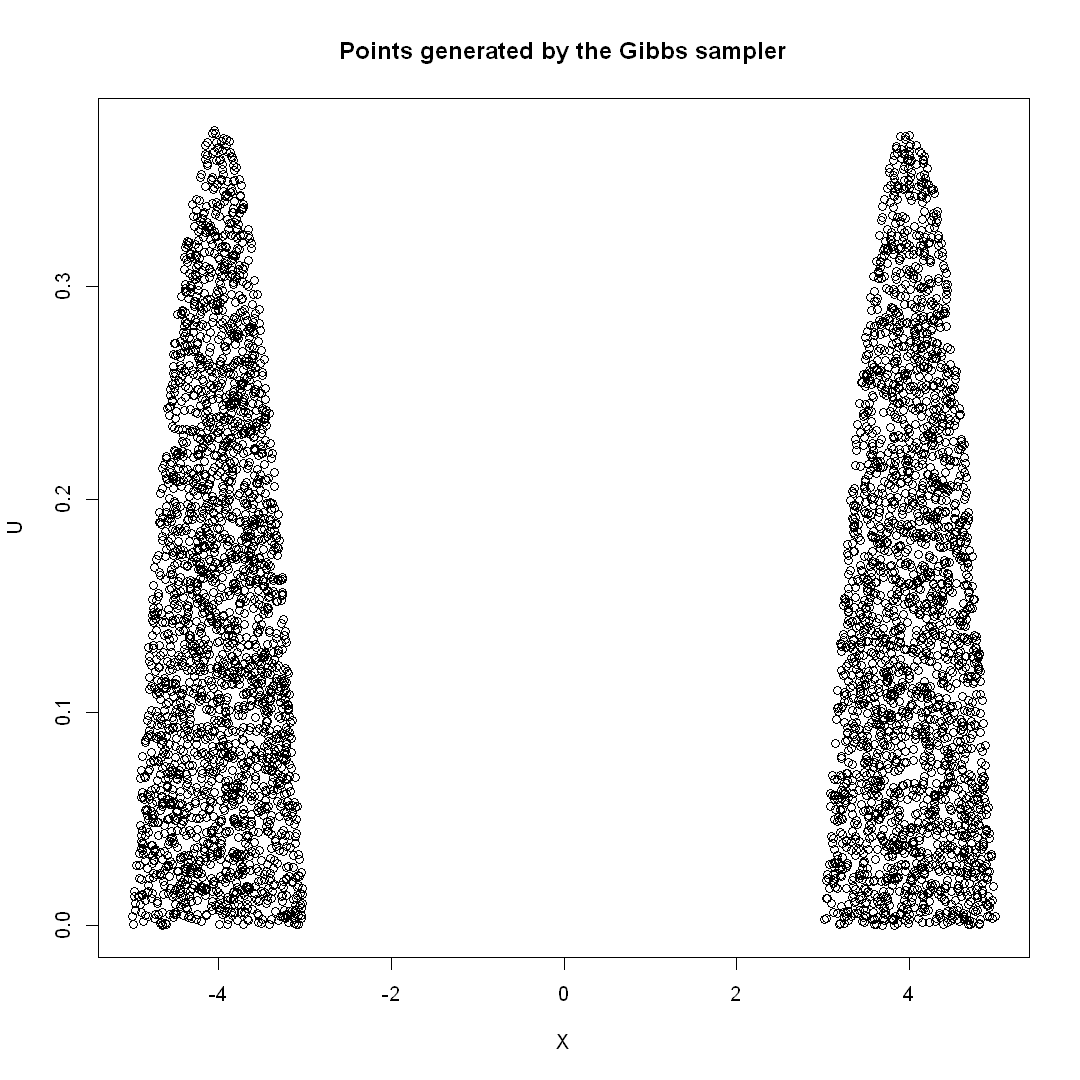

In [28]:
vectors <- gibbs(5000)
X3 <- as.numeric(unlist(vectors[1]))
U3 <- as.numeric(unlist(vectors[2]))

options(repr.plot.width=9, repr.plot.height=9)
plot(X3,U3,type='p',xlab='X',ylab='U',main='Points generated by the Gibbs sampler')

The Gibbs algorithm (again, as shown in part **(a)** of this question) is exactly the same as the slice sampler and hence compares to the random walk Metropolis sampler in the same way.